<a href="https://colab.research.google.com/github/Saifullah785/deep-learning-practice/blob/main/earlystopping_class_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing all important libraries

In [22]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns


# Creating a Data

In [23]:
x, y = make_circles(n_samples=100, noise=0.1, random_state=1)

# Ploting a Data

<Axes: >

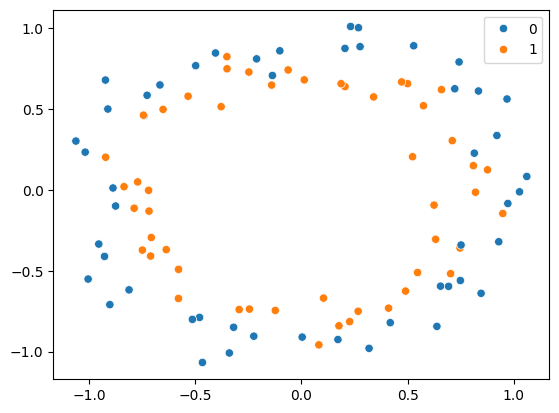

In [24]:
sns.scatterplot( x = x[:,0], y = x[:,1], hue = y)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=2)


In [48]:
model = Sequential()
model.add(Dense(128, input_dim=2, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [51]:

history = model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=500,verbose=0)




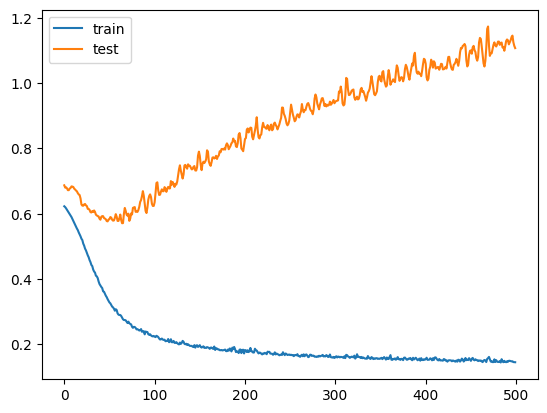

In [52]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


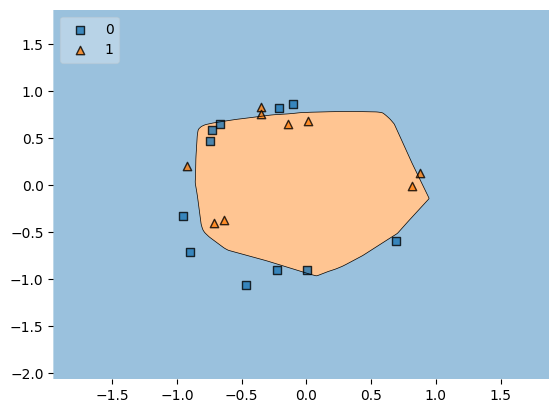

In [53]:
plot_decision_regions(x_test, y_test, clf = model, legend=2)
plt.show()

## Early_Stopping

In [55]:
model = Sequential()
model.add(Dense(128, input_dim=2, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [56]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [57]:
callback = EarlyStopping(
    monitor='val_loss',
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [59]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=500, callbacks=callback)




Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.5891 - loss: 0.6745 - val_accuracy: 0.4500 - val_loss: 0.7112
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.5539 - loss: 0.6790 - val_accuracy: 0.5000 - val_loss: 0.7127
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5523 - loss: 0.6800 - val_accuracy: 0.5000 - val_loss: 0.7124
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.6023 - loss: 0.6767 - val_accuracy: 0.5000 - val_loss: 0.7131
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5883 - loss: 0.6754 - val_accuracy: 0.4500 - val_loss: 0.7142
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6023 - loss: 0.6725 - val_accuracy: 0.4000 - val_loss: 0.7153
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5688 - loss: 0.6755 - val_accuracy: 0.4000 - val_loss: 0.7165
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.5844 - loss: 0.6736 - val_accuracy: 0.4000 - val_loss:

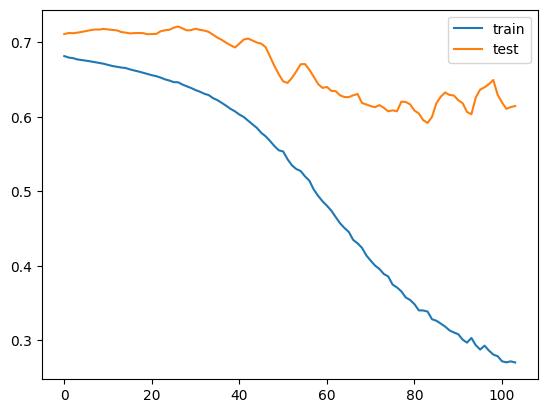

In [60]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


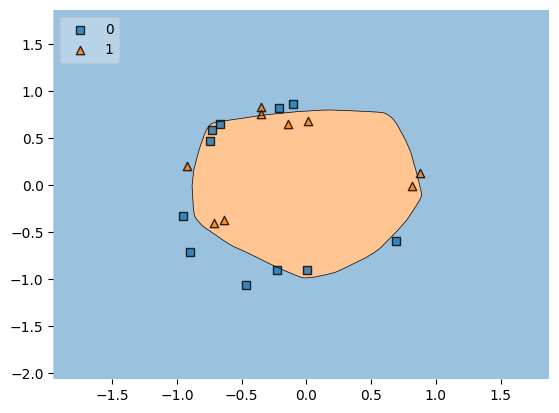

In [61]:
plot_decision_regions(x_test, y_test, clf = model, legend=2)
plt.show()